<h1 style = 'font-family: beauty-flower; background-color : blue; color:white'> Whatsapp Chat Analysis <h1>

In [2]:
import emoji
import regex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
def date_time(d):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, d)
    if result:
        return True
    else:
        return False

def get_author(a):
    a = a.split(":")
    if len(a) == 2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(', ')
    message = " ".join(splitline[1:])
    if get_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])

    else:
        author = None
    
    return date, time, author, message


In [4]:
data = []
conversation = "WhatsApp Chat with Ayomide.txt"

with open(conversation, encoding="utf-8") as chat:
    chat.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = chat.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)

        else:
            messageBuffer.append(line)

In [5]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df.head(10)
# print(df.Author.unique())

,Date,Time,Author,Message
0,2022-07-26,5:49 PM,iCurrent💡,Joan☺️
1,2022-07-26,8:23 PM,Ayomide,Emmanuel!🤗🤗🤗
2,2022-07-26,8:30 PM,iCurrent💡,Thank you again😅
3,2022-07-26,8:30 PM,iCurrent💡,How was your day?
4,2022-07-26,8:31 PM,Ayomide,🙄😹
5,2022-07-26,8:31 PM,Ayomide,It was okay We thank God Yours?
6,2022-07-26,8:32 PM,iCurrent💡,📌📌
7,2022-07-26,8:33 PM,iCurrent💡,Yeah..all thanks to God Mine was okay
8,2022-07-26,8:34 PM,Ayomide,Awesome! Good to have you back here😇
9,2022-07-26,8:35 PM,iCurrent💡,Thank you ma😁


In [6]:
df.tail(5)

,Date,Time,Author,Message
1433,2022-09-01,8:14 AM,iCurrent💡,Then He woke you very early oo
1434,2022-09-01,8:14 AM,iCurrent💡,Hope you slept well?
1435,2022-09-01,8:18 AM,Ayomide,😂 You will Sha see something to say
1436,2022-09-01,8:18 AM,Ayomide,Yes I did.😊 And you?
1437,2022-09-01,8:21 AM,iCurrent💡,🌝🌝🤐


In [7]:
df.sample(3)

,Date,Time,Author,Message
974,2022-08-26,11:15 PM,iCurrent💡,I'm not smiling with you
1048,2022-08-26,11:57 PM,iCurrent💡,"Ahnahnn...see you, egusi is small sth😂"
359,2022-08-08,4:10 PM,Ayomide,"Thanks for checking up yesterday, I really app..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1438 non-null   datetime64[ns]
 1   Time     1438 non-null   object        
 2   Author   1436 non-null   object        
 3   Message  1438 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 45.1+ KB


In [9]:
# Total message from 2022-07-26 to 2022-09-01
df.shape[0]

1438

In [10]:
#Number of Media Objects
media_msg = df.query("Message == '<Media omitted>'").shape[0]
media_msg

20

In [11]:
def get_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.is_emoji(char) for char in word ):
            emoji_list.append(word)
    return emoji_list
df['Emoji'] = df['Message'].apply(get_emoji)

total_emojis = sum(df.Emoji.str.len())
total_emojis

1297

In [12]:
df.head()

,Date,Time,Author,Message,Emoji
0,2022-07-26,5:49 PM,iCurrent💡,Joan☺️,[☺️]
1,2022-07-26,8:23 PM,Ayomide,Emmanuel!🤗🤗🤗,"[🤗, 🤗, 🤗]"
2,2022-07-26,8:30 PM,iCurrent💡,Thank you again😅,[😅]
3,2022-07-26,8:30 PM,iCurrent💡,How was your day?,[]
4,2022-07-26,8:31 PM,Ayomide,🙄😹,"[🙄, 😹]"


In [13]:
URLPATTERN =r'(https?://\S+)'
df['Url'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x))
df.head()

,Date,Time,Author,Message,Emoji,Url
0,2022-07-26,5:49 PM,iCurrent💡,Joan☺️,[☺️],[]
1,2022-07-26,8:23 PM,Ayomide,Emmanuel!🤗🤗🤗,"[🤗, 🤗, 🤗]",[]
2,2022-07-26,8:30 PM,iCurrent💡,Thank you again😅,[😅],[]
3,2022-07-26,8:30 PM,iCurrent💡,How was your day?,[],[]
4,2022-07-26,8:31 PM,Ayomide,🙄😹,"[🙄, 😹]",[]


In [14]:
total_links = np.sum(df.Url)

print("Chat with " + df.Author.unique()[0] + " and " + df.Author.unique()[1])
print(f"Total Message: {df.shape[0]}")
print("Number of Media Shared: ", media_msg)
print("Number of Emojis Shared", total_emojis)
print("Number of Links Shared: ", total_links)

Chat with iCurrent💡 and Ayomide
Total Message: 1438
Number of Media Shared:  20
Number of Emojis Shared 1297
Number of Links Shared:  []


In [15]:
media_msg = df.query("Message == '<Media omitted>'")
msg_df = df.drop(media_msg.index)
#msg_df.shape
msg_df['Letter_Count'] = msg_df['Message'].apply(lambda a:len(a))
msg_df['Word_Count'] = msg_df['Message'].apply(lambda a:len(a.split(' ')))
msg_df['MessageCount'] = 1

authors = df.Author.unique()
for i in range(len(authors)-1):
    # filter out messages of a particular user
    user_df = msg_df[msg_df['Author'] == authors[i]]
    print(f"Stats of {authors[i]}: ")
    print("\tMessage sent -", user_df.shape[0])
    words_pwer_message = (np.sum(user_df['Word_Count']))/user_df.shape[0]
    print("\tAverage Words per message", words_pwer_message)
    media = media_msg[media_msg['Author'] == authors[i]].shape[0]
    print("\tMedia Messages Sent", media)
    emojis = sum(user_df['Emoji'].str.len())
    print('\tEmojis Sent', emojis)
    # links = sum(user_df.Url)
    # print('\tLink Sent', links)
    print()

Stats of iCurrent💡: 
	Message sent - 705
	Average Words per message 6.085106382978723
	Media Messages Sent 10
	Emojis Sent 591

Stats of Ayomide: 
	Message sent - 711
	Average Words per message 6.2925457102672295
	Media Messages Sent 10
	Emojis Sent 702



In [16]:
total_emojis_list = list(set([a for b in msg_df.Emoji for a in b]))
total_emojis = len(total_emojis_list)
print("Only " + str(total_emojis) + " unique emojis characters")

total_emojis_list = list([a for b in msg_df.Emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key = lambda x: x[1], reverse=True)

for i in emoji_dict:
    print(i, end=" ")

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Only 79 unique emojis characters
('😂', 206) ('😅', 172) ('💔', 85) ('🙄', 67) ('😹', 55) ('🤣', 55) ('🌝', 50) ('😁', 37) ('🤔', 36) ('🙂', 36) ('🤧', 34) ('🥰', 34) ('😒', 32) ('🙌', 26) ('✨', 26) ('😏', 25) ('😕', 25) ('😊', 24) ('😩', 21) ('🙃', 20) ('🙌🏽', 19) ('🤗', 18) ('😇', 17) ('☺️', 12) ('🤲🏼', 10) ('😭', 10) ('🙏', 8) ('🙆\u200d♀️', 8) ('🥺', 7) ('🔥', 6) ('🙇\u200d♀️', 5) ('🤪', 5) ('🤦\u200d♀️', 5) ('😋', 5) ('🤓', 5) ('😔', 4) ('😉', 4) ('🚶🏽\u200d♂️', 4) ('\U0001f979', 4) ('🏃🏽\u200d♂️', 4) ('🤐', 4) ('😝', 3) ('😃', 3) ('👏🏼', 3) ('🐐', 3) ('😳', 3) ('🥲', 3) ('📌', 2) ('\U0001faf1🏻\u200d\U0001faf2🏼', 2) ('🧐', 2) ('☹️', 2) ('💃', 2) ('💡', 2) ('😜', 2) ('🕺🏽', 2) ('🙆🏽\u200d♂️', 2) ('🤦🏽\u200d♂️', 2) ('❤️', 2) ('👩\u200d🦯', 2) ('🥳', 2) ('😍', 2) ('🌚', 2) ('🚶\u200d♀️', 2) ('💯', 2) ('😱', 1) ('😣', 1) ('🙁', 1) ('🥶', 1) ('🙈', 1) ('😀', 1) ('👏', 1) ('🧑🏽\u200d🦯', 1) ('🤷\u200d♀️', 1) ('🤨', 1) ('🍽️', 1) ('✍️', 1) ('💥', 1) ('😄', 1) ('😫', 1) 

There are 45052 words in all the messages.


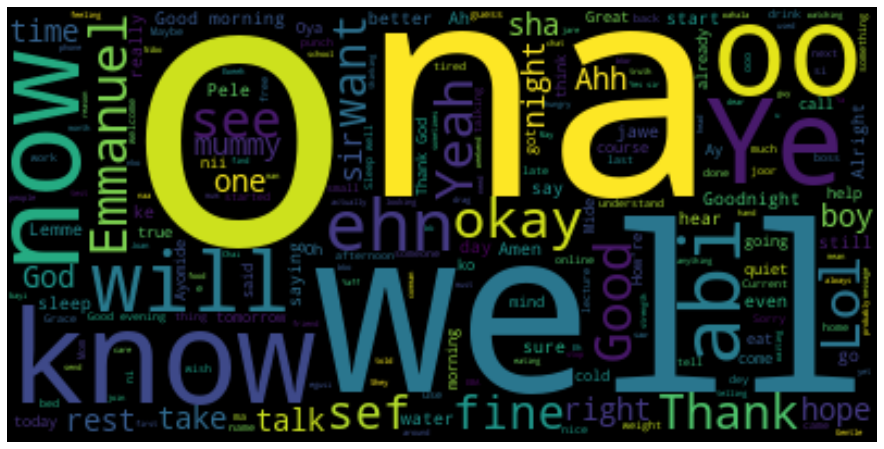

In [17]:
text = " ".join(review for review in msg_df.Message)
print("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()